In [1]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np

# Afficher la version de pandas (bonne pratique pour la reproductibilité)
print(f"Version de Pandas : {pd.__version__}")

# Chemin vers le fichier CSV
# Assurez-vous que 'creditcard.csv' est dans le même répertoire que votre notebook
file_path = 'creditcard.csv'

# Charger le dataset dans un DataFrame Pandas
try:
    df = pd.read_csv(file_path)
    print("\nDataset chargé avec succès !")
except FileNotFoundError:
    print(f"Erreur : Le fichier '{file_path}' n'a pas été trouvé. Vérifiez le chemin.")
    print("Assurez-vous que le fichier 'creditcard.csv' est dans le même dossier que ce notebook.")
    df = None

# Si le DataFrame a été chargé, afficher les premières informations
if df is not None:
    print("\n--- Premières 5 lignes du dataset ---")
    print(df.head())

    print("\n--- Informations générales sur le dataset ---")
    print(df.info())

    print("\n--- Statistiques descriptives des colonnes numériques ---")
    print(df.describe())

    print("\n--- Vérification des valeurs manquantes ---")
    print(df.isnull().sum())

    print("\n--- Distribution de la classe (Frauduleux ou Non) ---")
    print(df['Class'].value_counts())
    print(f"Pourcentage de transactions frauduleuses : {round(df['Class'].value_counts()[1]/len(df) * 100, 2)}%")

Version de Pandas : 2.3.0

Dataset chargé avec succès !

--- Premières 5 lignes du dataset ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817

In [2]:
# Import de la bibliothèque de pré-traitement de scikit-learn
from sklearn.preprocessing import StandardScaler

# --- 1. Préparation de la colonne 'Time' ---
# Convertir 'Time' en heures pour une meilleure lisibilité
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600) % 24)
print("\n--- Premières lignes avec la nouvelle colonne 'Hour' ---")
print(df[['Time', 'Hour', 'Class']].head())

# --- 2. Préparation de la colonne 'Amount' ---
# Initialiser le StandardScaler
scaler = StandardScaler()

# Appliquer la standardisation à la colonne 'Amount'
df['Scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
print("\n--- Premières lignes avec la nouvelle colonne 'Scaled_Amount' ---")
print(df[['Amount', 'Scaled_Amount', 'Class']].head())

# Afficher les statistiques descriptives des nouvelles colonnes pour vérifier la transformation
print("\n--- Statistiques descriptives des nouvelles colonnes Hour et Scaled_Amount ---")
print(df[['Hour', 'Scaled_Amount']].describe())

print("\n--- Premières lignes du DataFrame après transformations ---")
print(df.head())


--- Premières lignes avec la nouvelle colonne 'Hour' ---
   Time  Hour  Class
0   0.0   0.0      0
1   0.0   0.0      0
2   1.0   0.0      0
3   1.0   0.0      0
4   2.0   0.0      0

--- Premières lignes avec la nouvelle colonne 'Scaled_Amount' ---
   Amount  Scaled_Amount  Class
0  149.62       0.244964      0
1    2.69      -0.342475      0
2  378.66       1.160686      0
3  123.50       0.140534      0
4   69.99      -0.073403      0

--- Statistiques descriptives des nouvelles colonnes Hour et Scaled_Amount ---
                Hour  Scaled_Amount
count  284807.000000   2.848070e+05
mean       14.046470  -3.672378e-17
std         5.835854   1.000002e+00
min         0.000000  -3.532294e-01
25%        10.000000  -3.308401e-01
50%        15.000000  -2.652715e-01
75%        19.000000  -4.471707e-02
max        23.000000   1.023622e+02

--- Premières lignes du DataFrame après transformations ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.

In [7]:
# Import de la bibliothèque pour se connecter à PostgreSQL
import psycopg2

# Paramètres de connexion à la base de données
# ASSURE-TOI QUE CES INFORMATIONS CORRESPONDENT EXACTEMENT
# à l'utilisateur et au mot de passe que tu as définis DANS WSL (sans accents)
db_params = {
    'host': 'localhost',        # PostgreSQL est dans le même WSL, donc 'localhost'
    'database': 'fraude_db',    # Le nom de la base de données que tu as créé
    'user': 'fraude',    # L'utilisateur que tu as créé
    'password': 'fraude', # Le mot de passe de cet utilisateur
    'port': 5432                # Le port par défaut de PostgreSQL dans WSL.
}

# Tenter de se connecter à la base de données
try:
    conn = psycopg2.connect(**db_params)
    print("Connexion à la base de données PostgreSQL réussie !")

    # Créer un curseur pour exécuter des commandes SQL
    cur = conn.cursor()

    # Exemple de requête (vérifier la version de la BDD)
    cur.execute("SELECT version();")
    db_version = cur.fetchone()[0]
    print(f"Version de PostgreSQL : {db_version}")

    # Fermer le curseur et la connexion (très importante bonne pratique)
    cur.close()
    conn.close()
    print("Curseur et connexion fermés.")

except psycopg2.Error as e:
    print(f"Erreur de connexion à la base de données : {e}")
    print("Vérifiez les paramètres de connexion (host, database, user, password, port).")
    print("Assurez-vous que le service PostgreSQL est démarré dans WSL (sudo systemctl status postgresql).")
    print("Assurez-vous que l'utilisateur et la base de données ont été créés correctement SANS CARACTÈRES SPÉCIAUX.")

Connexion à la base de données PostgreSQL réussie !
Version de PostgreSQL : PostgreSQL 16.9 (Ubuntu 16.9-0ubuntu0.24.04.1) on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 13.3.0-6ubuntu2~24.04) 13.3.0, 64-bit
Curseur et connexion fermés.


In [10]:
# Import de la bibliothèque pour se connecter à PostgreSQL
import psycopg2
# Import de SQLAlchemy pour aider Pandas à interagir avec la BDD
from sqlalchemy import create_engine

# Paramètres de connexion à la base de données (utiliser les mêmes que précédemment)
db_params = {
    'host': 'localhost',
    'database': 'fraude_db',
    'user': 'fraude',     # Assure-toi que c'est le bon utilisateur
    'password': 'fraude', # Assure-toi que c'est le bon mot de passe
    'port': 5432
}

# --- 1. Établir une connexion à la base de données pour Pandas (via SQLAlchemy) ---

# Créer l'URL de connexion pour SQLAlchemy
# psycopg2 est le driver, donc 'postgresql+psycopg2'
db_connection_str = f"postgresql+psycopg2://{db_params['user']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['database']}"

# Créer un moteur de connexion SQLAlchemy
try:
    engine = create_engine(db_connection_str)
    print("Moteur SQLAlchemy créé avec succès pour la connexion à PostgreSQL.")
except Exception as e:
    print(f"Erreur lors de la création du moteur SQLAlchemy : {e}")
    engine = None

# --- 2. Insérer le DataFrame dans une table PostgreSQL ---

if engine is not None and df is not None:
    table_name = 'transactions' # Nom de la table dans PostgreSQL
    try:
        # Utiliser la méthode to_sql() de Pandas pour insérer le DataFrame
        # if_exists='replace': Si la table existe déjà, elle sera remplacée. Utile pour les tests.
        # index=False: N'insère pas l'index du DataFrame Pandas comme une colonne.
        df.to_sql(table_name, engine, if_exists='replace', index=False)
        print(f"Données du DataFrame insérées avec succès dans la table '{table_name}'.")
    except Exception as e:
        print(f"Erreur lors de l'insertion des données dans la table '{table_name}' : {e}")

# --- 3. Vérifier l'insertion avec une requête SQL directe ---

# Établir une connexion psycopg2 normale pour la vérification
# Note : on ferme et rouvre une connexion car to_sql peut laisser la connexion ouverte temporairement.
try:
    conn = psycopg2.connect(**db_params)
    cur = conn.cursor()

    # Compter le nombre de lignes dans la nouvelle table
    cur.execute(f"SELECT COUNT(*) FROM {table_name};")
    row_count = cur.fetchone()[0]
    print(f"Nombre de lignes dans la table '{table_name}' : {row_count}")

    # Afficher les 5 premières lignes de la table pour vérification
    cur.execute(f"SELECT * FROM {table_name} LIMIT 5;")
    first_rows = cur.fetchall()
    print(f"\n--- Premières 5 lignes de la table '{table_name}' dans PostgreSQL ---")
    for row in first_rows:
        print(row)

    # Fermer le curseur et la connexion
    cur.close()
    conn.close()
    print("Vérification terminée. Curseur et connexion fermés.")

except psycopg2.Error as e:
    print(f"Erreur lors de la vérification des données : {e}")
    print("Vérifiez la table et la connexion.")

Moteur SQLAlchemy créé avec succès pour la connexion à PostgreSQL.
Données du DataFrame insérées avec succès dans la table 'transactions'.
Nombre de lignes dans la table 'transactions' : 284807

--- Premières 5 lignes de la table 'transactions' dans PostgreSQL ---
(0.0, -1.3598071336738, -0.0727811733098497, 2.53634673796914, 1.37815522427443, -0.338320769942518, 0.462387777762292, 0.239598554061257, 0.0986979012610507, 0.363786969611213, 0.0907941719789316, -0.551599533260813, -0.617800855762348, -0.991389847235408, -0.311169353699879, 1.46817697209427, -0.470400525259478, 0.207971241929242, 0.0257905801985591, 0.403992960255733, 0.251412098239705, -0.018306777944153, 0.277837575558899, -0.110473910188767, 0.0669280749146731, 0.128539358273528, -0.189114843888824, 0.133558376740387, -0.0210530534538215, 149.62, 0, 0.0, 0.24496426337017327)
(0.0, 1.19185711131486, 0.26615071205963, 0.16648011335321, 0.448154078460911, 0.0600176492822243, -0.0823608088155687, -0.0788029833323113, 0.0851

Nombre de transactions frauduleuses : 492
Nombre de transactions légitimes : 284315

--- Statistiques descriptives de 'Amount' pour les fraudes ---
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

--- Statistiques descriptives de 'Amount' pour les transactions légitimes ---
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


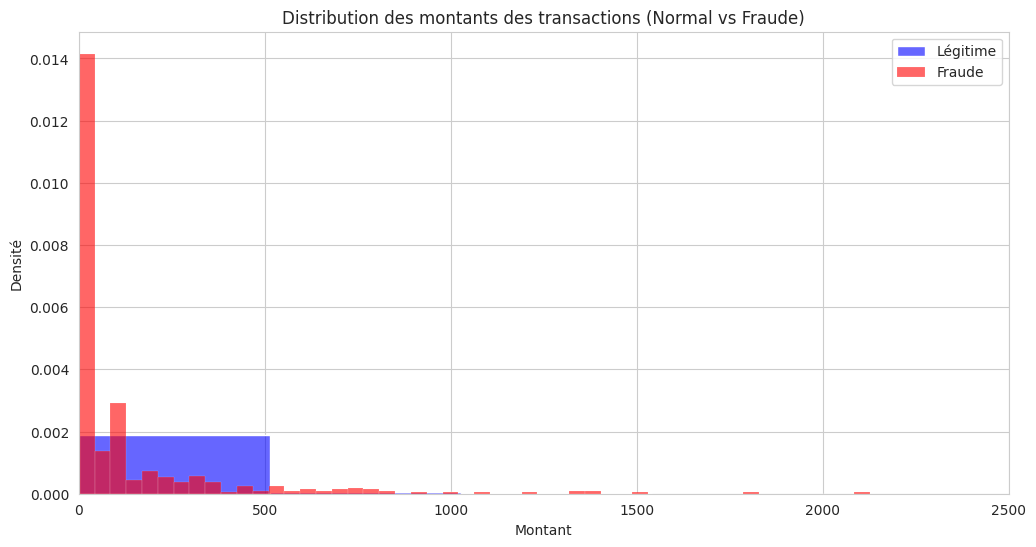

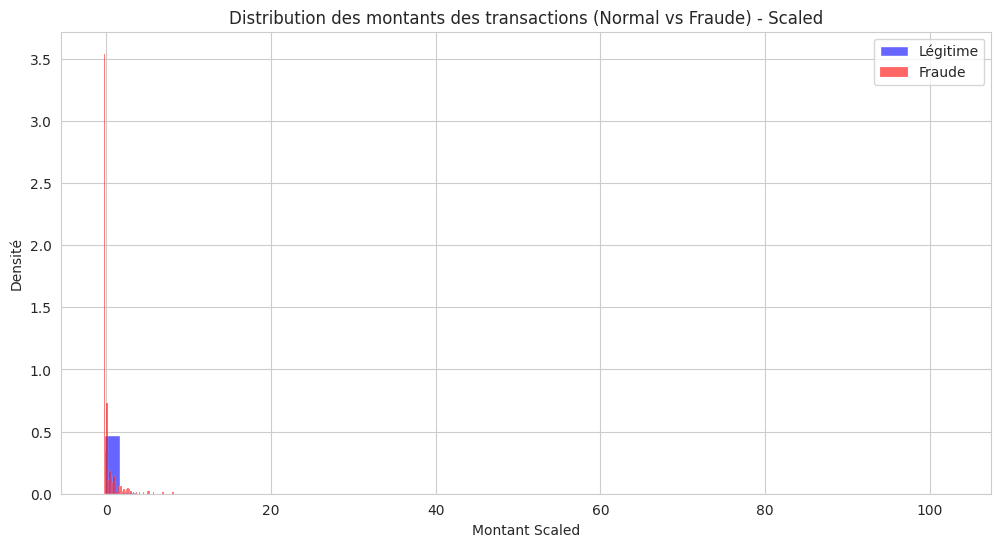

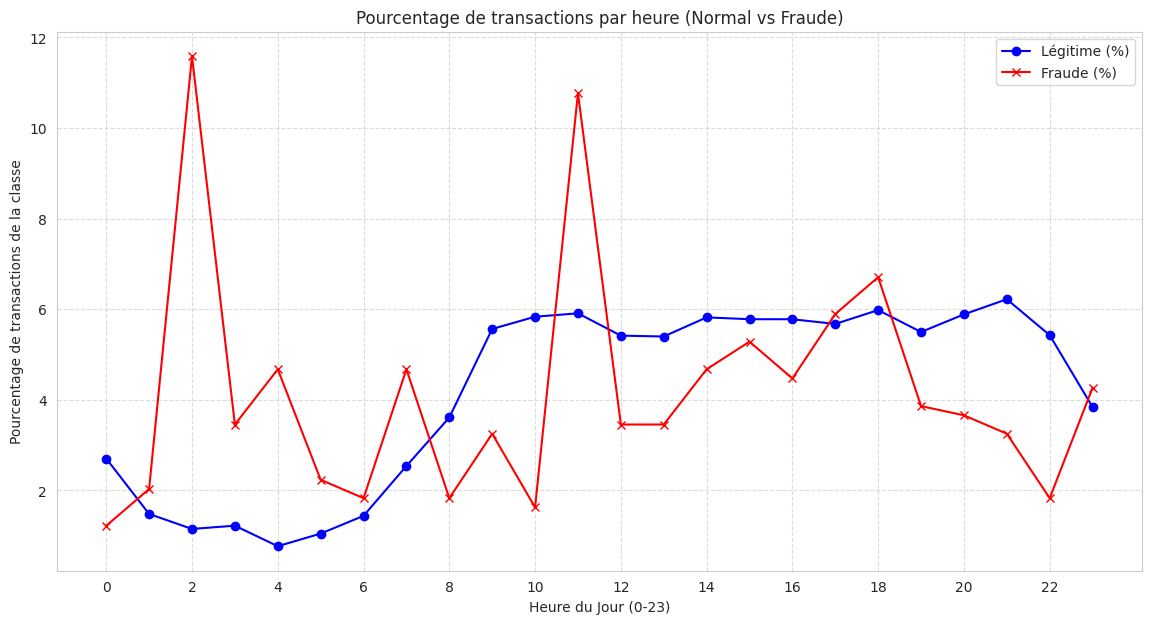


--- Moyennes des colonnes Vn sélectionnées (Normal vs Fraude) ---
V1     0.008258
V2    -0.006271
V3     0.012171
V4    -0.007860
V10    0.009824
V14    0.012064
V17    0.011535
dtype: float64
V1    -4.771948
V2     3.623778
V3    -7.033281
V4     4.542029
V10   -5.676883
V14   -6.971723
V17   -6.665836
dtype: float64


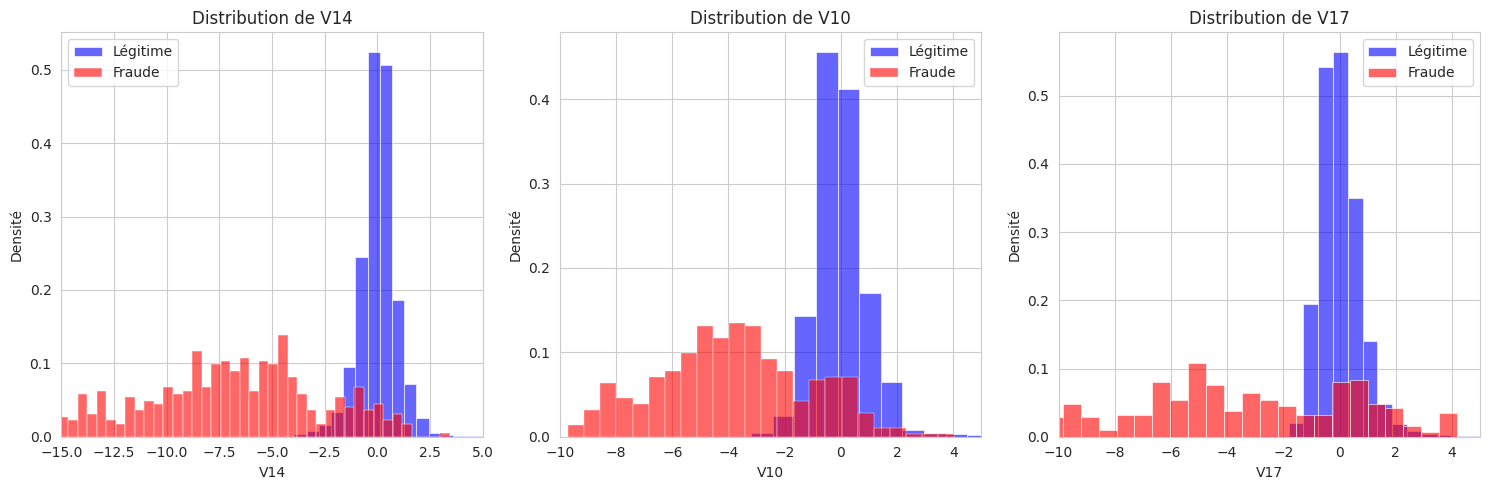

In [11]:
# Import des bibliothèques de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer le style des graphiques pour une meilleure lisibilité
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Taille de figure par défaut

# Séparer les données en frauduleuses et légitimes pour faciliter les comparaisons
df_fraud = df[df['Class'] == 1]
df_legit = df[df['Class'] == 0]

print(f"Nombre de transactions frauduleuses : {len(df_fraud)}")
print(f"Nombre de transactions légitimes : {len(df_legit)}")

# --- 1. Analyse de la colonne 'Amount' (Montant) ---

print("\n--- Statistiques descriptives de 'Amount' pour les fraudes ---")
print(df_fraud['Amount'].describe())
print("\n--- Statistiques descriptives de 'Amount' pour les transactions légitimes ---")
print(df_legit['Amount'].describe())

# Visualisation des distributions de 'Amount' pour les deux classes
plt.figure(figsize=(12, 6))
sns.histplot(df_legit['Amount'], bins=50, color='blue', alpha=0.6, stat='density', label='Légitime')
sns.histplot(df_fraud['Amount'], bins=50, color='red', alpha=0.6, stat='density', label='Fraude')
plt.title('Distribution des montants des transactions (Normal vs Fraude)')
plt.xlabel('Montant')
plt.ylabel('Densité')
plt.xlim(0, 2500) # Limiter l'axe X pour mieux voir les détails, car peu de très gros montants
plt.legend()
plt.show()

# Visualisation avec Scaled_Amount (plus comparable aux Vn)
plt.figure(figsize=(12, 6))
sns.histplot(df_legit['Scaled_Amount'], bins=50, color='blue', alpha=0.6, stat='density', label='Légitime')
sns.histplot(df_fraud['Scaled_Amount'], bins=50, color='red', alpha=0.6, stat='density', label='Fraude')
plt.title('Distribution des montants des transactions (Normal vs Fraude) - Scaled')
plt.xlabel('Montant Scaled')
plt.ylabel('Densité')
plt.legend()
plt.show()


# --- 2. Analyse de la colonne 'Hour' (Heure du jour) ---

# Compter les transactions par heure pour chaque classe
fraud_hour_counts = df_fraud['Hour'].value_counts().sort_index()
legit_hour_counts = df_legit['Hour'].value_counts().sort_index()

# Pourcentage des fraudes par rapport au total de fraudes à chaque heure
# Utile si on veut voir la distribution temporelle RELATIVE des fraudes
fraud_hour_percentage = (fraud_hour_counts / len(df_fraud)) * 100

# Pourcentage des transactions légitimes par rapport au total de légitimes à chaque heure
legit_hour_percentage = (legit_hour_counts / len(df_legit)) * 100

# Visualisation des transactions (normalisées par classe) par heure
plt.figure(figsize=(14, 7))
plt.plot(legit_hour_percentage.index, legit_hour_percentage.values, label='Légitime (%)', color='blue', marker='o')
plt.plot(fraud_hour_percentage.index, fraud_hour_percentage.values, label='Fraude (%)', color='red', marker='x')
plt.title('Pourcentage de transactions par heure (Normal vs Fraude)')
plt.xlabel('Heure du Jour (0-23)')
plt.ylabel('Pourcentage de transactions de la classe')
plt.xticks(np.arange(0, 24, 2)) # Afficher les heures paires
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# --- 3. Analyse de quelques colonnes 'Vn' (Caractéristiques Anonymisées) ---

# Comparaison des moyennes/médianes pour quelques Vn clés (par exemple, V1, V2, V3, V4, V10, V14, V17)
# Les colonnes V10, V14, V17 sont souvent citées comme importantes pour ce dataset
selected_v_cols = ['V1', 'V2', 'V3', 'V4', 'V10', 'V14', 'V17']

print("\n--- Moyennes des colonnes Vn sélectionnées (Normal vs Fraude) ---")
print(df_legit[selected_v_cols].mean())
print(df_fraud[selected_v_cols].mean())

# Visualisation des distributions de quelques colonnes 'Vn' (par exemple V14, très discriminante pour la fraude)
plt.figure(figsize=(15, 5))

# Plot pour V14
plt.subplot(1, 3, 1) # 1 ligne, 3 colonnes, 1ère sous-figure
sns.histplot(df_legit['V14'], bins=50, color='blue', alpha=0.6, stat='density', label='Légitime')
sns.histplot(df_fraud['V14'], bins=50, color='red', alpha=0.6, stat='density', label='Fraude')
plt.title('Distribution de V14')
plt.xlabel('V14')
plt.ylabel('Densité')
plt.legend()
plt.xlim(-15, 5) # Ajuster les limites pour mieux voir

# Plot pour V10
plt.subplot(1, 3, 2) # 1 ligne, 3 colonnes, 2ème sous-figure
sns.histplot(df_legit['V10'], bins=50, color='blue', alpha=0.6, stat='density', label='Légitime')
sns.histplot(df_fraud['V10'], bins=50, color='red', alpha=0.6, stat='density', label='Fraude')
plt.title('Distribution de V10')
plt.xlabel('V10')
plt.ylabel('Densité')
plt.legend()
plt.xlim(-10, 5)

# Plot pour V17
plt.subplot(1, 3, 3) # 1 ligne, 3 colonnes, 3ème sous-figure
sns.histplot(df_legit['V17'], bins=50, color='blue', alpha=0.6, stat='density', label='Légitime')
sns.histplot(df_fraud['V17'], bins=50, color='red', alpha=0.6, stat='density', label='Fraude')
plt.title('Distribution de V17')
plt.xlabel('V17')
plt.ylabel('Densité')
plt.legend()
plt.xlim(-10, 5)

plt.tight_layout() # Ajuster l'espacement des sous-graphiques
plt.show()